# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import json
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [62]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [63]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        city_weather = response["weather"][0]["description"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kargasok
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | nizhniy tsasuchey
Processing Record 4 of Set 1 | stepnogorsk
Processing Record 5 of Set 1 | nyagan
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | bousso
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | soyo
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | leningradskiy
Processing Record 21 of Set 1 | bethel
Processing Re

In [64]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64


In [65]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kargasok,59.0556,80.8572,-4.00,78,100,5.09,RU,1680362045
1,nizhniy tsasuchey,50.5167,115.1333,-0.77,33,100,6.33,RU,1680362045
2,stepnogorsk,52.3544,71.8869,-0.26,46,1,5.21,KZ,1680362046
3,nyagan,62.1406,65.3936,2.28,95,100,5.13,RU,1680362046
4,torbay,47.6666,-52.7314,3.65,75,13,1.79,CA,1680362046


In [66]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [67]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kargasok,59.0556,80.8572,-4.00,78,100,5.09,RU,1680362045
1,nizhniy tsasuchey,50.5167,115.1333,-0.77,33,100,6.33,RU,1680362045
2,stepnogorsk,52.3544,71.8869,-0.26,46,1,5.21,KZ,1680362046
3,nyagan,62.1406,65.3936,2.28,95,100,5.13,RU,1680362046
4,torbay,47.6666,-52.7314,3.65,75,13,1.79,CA,1680362046


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

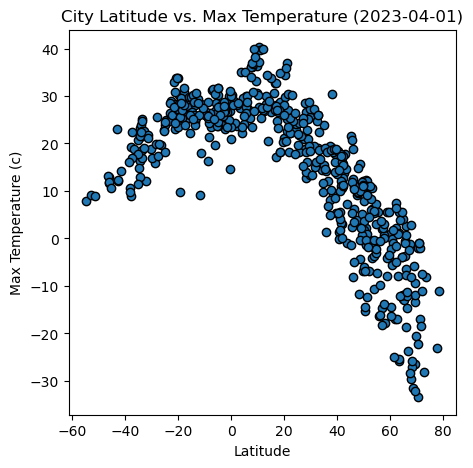

In [68]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
today = datetime.date.today()

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.title("City Latitude vs. Max Temperature (" + str(today) + ")")

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

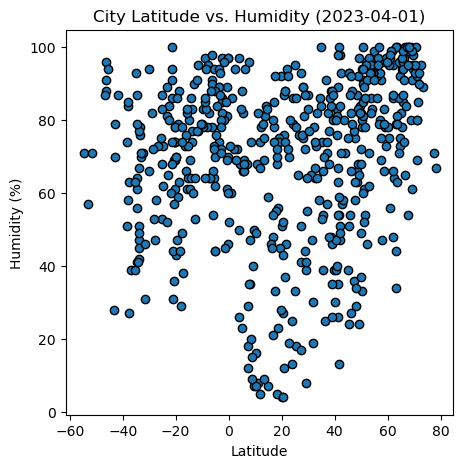

In [69]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (" + str(today) + ")")

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

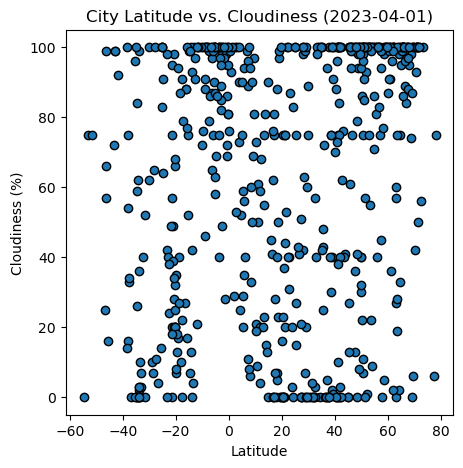

In [70]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (" + str(today) + ")")

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

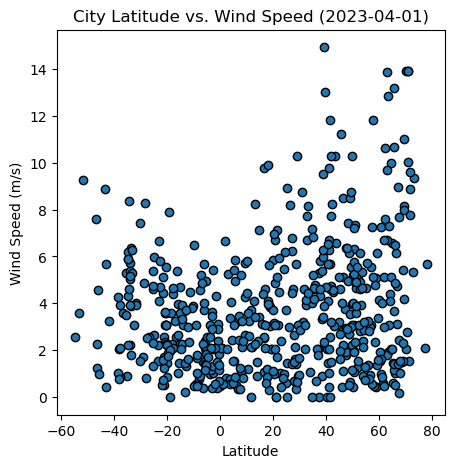

In [71]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (" + str(today) + ")")

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def linear_regr(x_values,y_values,x,y):
    (slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "Y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print("The r-value is: " + str(rvalues))
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy=(x,y),fontsize = 15, color = "red")



In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kargasok,59.0556,80.8572,-4.00,78,100,5.09,RU,1680362045
1,nizhniy tsasuchey,50.5167,115.1333,-0.77,33,100,6.33,RU,1680362045
2,stepnogorsk,52.3544,71.8869,-0.26,46,1,5.21,KZ,1680362046
3,nyagan,62.1406,65.3936,2.28,95,100,5.13,RU,1680362046
4,torbay,47.6666,-52.7314,3.65,75,13,1.79,CA,1680362046


In [74]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port elizabeth,-33.9180,25.5701,25.05,51,2,2.24,ZA,1680362047
6,faanui,-16.4833,-151.7500,27.72,73,27,2.56,PF,1680361759
10,soyo,-6.1349,12.3689,26.93,78,87,3.71,AO,1680362048
11,ushuaia,-54.8000,-68.3000,7.81,71,0,2.57,AR,1680361891
12,mataura,-46.1927,168.8643,13.04,91,66,1.23,NZ,1680362048


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8830131557900013


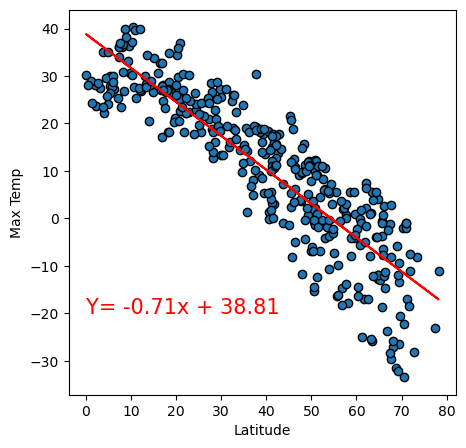

In [75]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regr(x_values,y_values,0,-20)


The r-value is: 0.6437611900050921


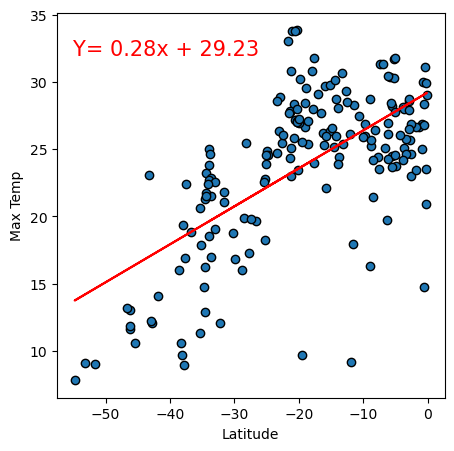

In [76]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regr(x_values,y_values,-55,32)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Above I have analyzed the relationship between the Latitude and the Maximum Temperature, split between the Northern - and Southern Hemisphere. 

The findings suggest that there is indeed a relationship between latitude and maximum temperature, and that this relationship differs between the Northern - and Southern Hemisphere. 

1. The negative r-value for the Northern Hemisphere suggests a strong negative correlation between latitude and max temperature. The equation suggest that as latitude increases, the maximum temperature decreases;
2. The positive r-value for the Southern Hemisphere suggests a moderate positive correlation between latitude and max temperature. The equation suggest that as latitude increases, the maximum temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.44050517777568365


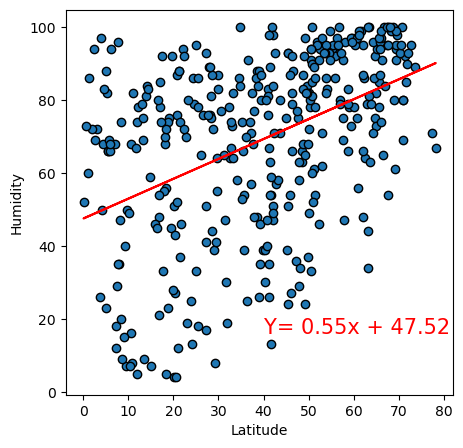

In [77]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regr(x_values,y_values,40,16)

The r-value is: 0.25038196738577295


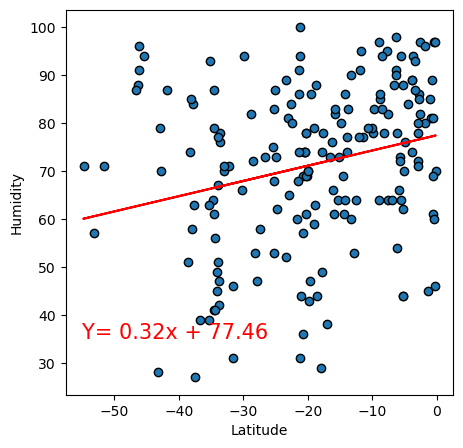

In [80]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regr(x_values,y_values,-55,35)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Above I have analyzed the relationship between the Latitude and the Humidity, split between the Northern - and Southern Hemisphere. 

The findings suggest that there is a relationship between latitude and maximum temperature, although not a strong one. Also, this relationship seems to be similar for both the Northern - and Southern Hemisphere. 

1. The positive r-value for the Northern Hemisphere suggests a low positive correlation between latitude and humidity. The equation suggest that as latitude increases, the humidity increases as well;
2. The positive r-value for the Southern Hemisphere suggests a similar, but lower, positive correlation between latitude and humidity. The equation suggest that as latitude increases, the humidity increases as well.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.30716995123816687


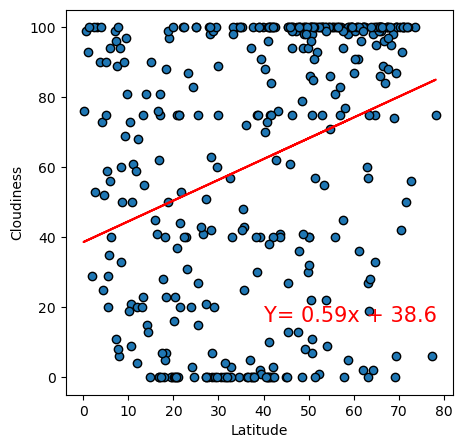

In [81]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regr(x_values,y_values,40,16)

The r-value is: 0.43316629289215053


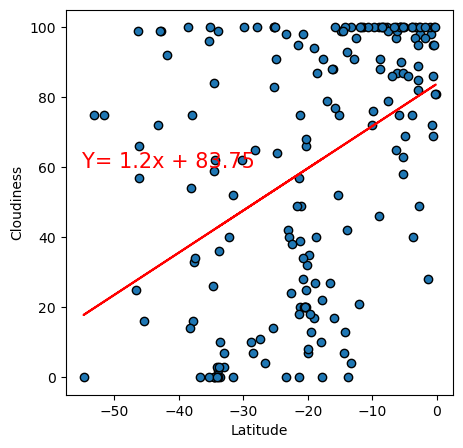

In [82]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regr(x_values,y_values,-55,60)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Above I have analyzed the relationship between the Latitude and Cloudiness, split between the Northern - and Southern Hemisphere. 

The findings suggest that there is a relationship between latitude and cloudiness, although not a strong one. Also, this relationship seems to be similar for both the Northern - and Southern Hemisphere. 

1. The positive r-value for the Northern Hemisphere suggests a low positive correlation between latitude and cloudiness. The equation suggest that as latitude increases, the cloudiness increases as well;
2. The positive r-value for the Southern Hemisphere suggests a similar, but slighly higher, positive correlation between latitude and cloudiness. The equation suggest that as latitude increases, the cloudiness increases as well.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.23539156890083301


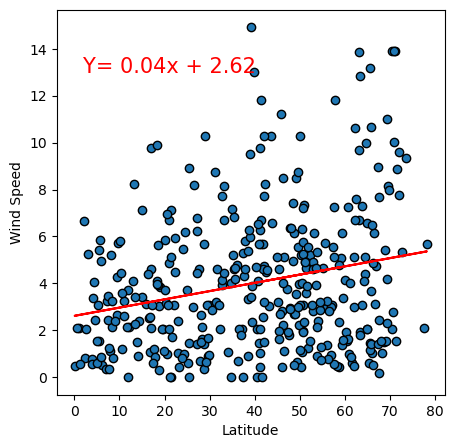

In [83]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regr(x_values,y_values,2,13)

The r-value is: -0.36390370787503606


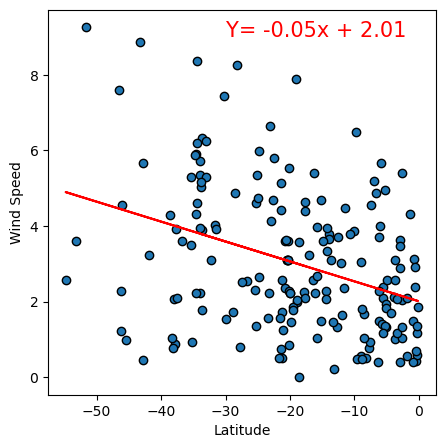

In [86]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regr(x_values,y_values,-30,9)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Above I have analyzed the relationship between the Latitude and the Wind Speed, split between the Northern - and Southern Hemisphere. 

The findings suggest that there is indeed a relationship between latitude and wind speed, and that this relationship differs between the Northern - and Southern Hemisphere. 

1. The positive r-value for the Northern Hemisphere suggests a weak positive correlation between latitude and wind speed. The equation suggest that as latitude increases, the wind speed increases as well;
2. The negative r-value for the Southern Hemisphere suggests a low negative correlation between latitude and wind speed. The equation suggest that as latitude increases, the wind speed decreases.